In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =pd.read_csv('../data/vikar_preprocessed.csv', low_memory=False)
df.head()

,Pickup_Date,DropOff_Date,Age,Total,Rental_Duration_Days,Pickup_Time,DropOff_Time,Vehicle,Pickup_Location,DropOff_Location,Driving Area,Country
0,2024-04-11,2024-04-16,39.0,6520.0,5,15,27,4,5,5,0,25
1,2024-03-27,2024-04-02,38.0,7620.0,6,9,13,3,0,11,1,25
2,2024-03-22,2024-03-30,40.0,8300.0,7,36,17,3,11,11,0,25
3,2024-03-23,2024-03-25,56.0,4360.0,2,7,27,3,4,4,0,25
4,2024-06-29,2024-07-31,47.0,29420.0,31,28,3,1,11,11,0,25


## EDA

In [3]:
print(df.Age.describe())
print(df.Total.describe())
print(df.Rental_Duration_Days.describe())

count    281.000000
mean      38.950178
std        9.613105
min       20.000000
25%       33.000000
50%       38.000000
75%       43.000000
max       66.000000
Name: Age, dtype: float64
count      281.000000
mean      8603.272954
std       8141.212109
min        900.000000
25%       4220.000000
50%       6190.000000
75%       9960.000000
max      73067.000000
Name: Total, dtype: float64
count    281.000000
mean       8.234875
std       10.613081
min        0.000000
25%        3.000000
50%        5.000000
75%        9.000000
max       92.000000
Name: Rental_Duration_Days, dtype: float64


C:\Users\kathe\AppData\Local\Temp\ipykernel_25820\2304855600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df["Country"], palette="magma")


<Axes: xlabel='count', ylabel='Country'>

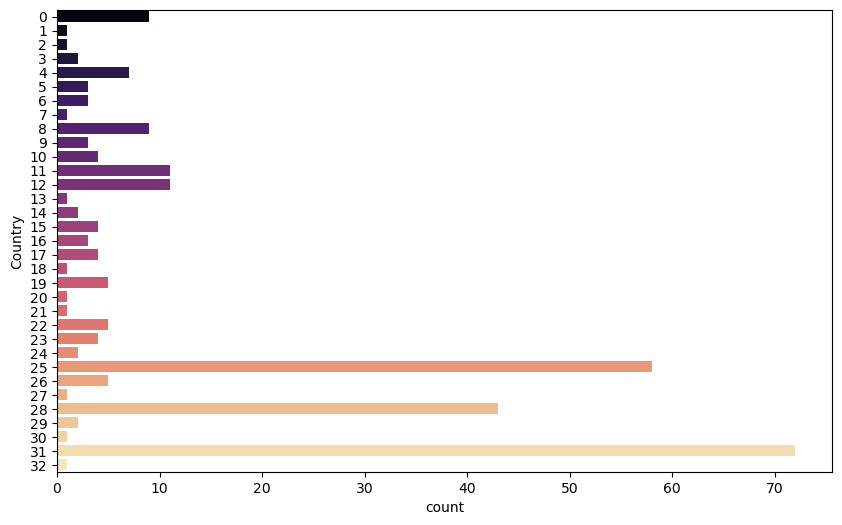

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(y = df["Country"], palette="magma")

C:\Users\kathe\AppData\Local\Temp\ipykernel_25820\2005201298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df["Vehicle"], palette="magma")


<Axes: xlabel='count', ylabel='Vehicle'>

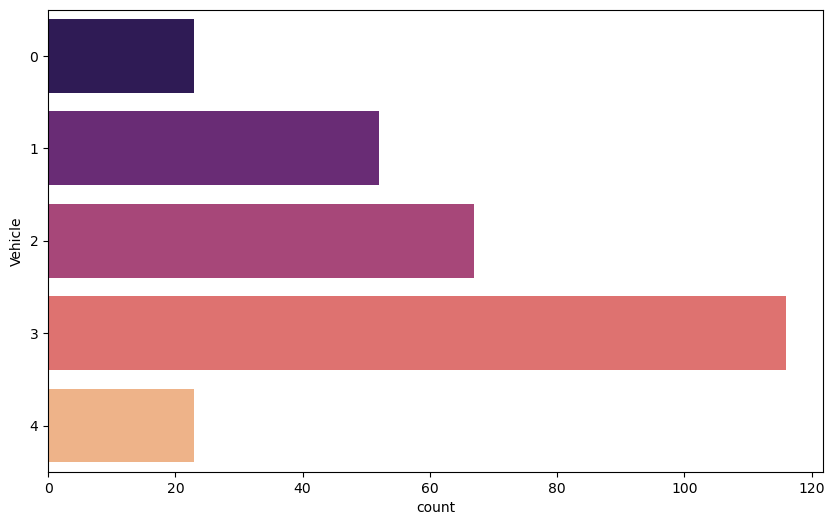

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y = df["Vehicle"], palette="magma")

C:\Users\kathe\AppData\Local\Temp\ipykernel_25820\3906499442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Driving Area"], palette="magma")


([<matplotlib.patches.Wedge at 0x1680c6003a0>,
 [Text(-0.29754863867223297, 1.058992354846956, 'Phuket Only'),
  Text(-0.23791687476722184, -1.0739625508838744, 'Unknown'),
  Text(0.9695693532489261, -0.5195529513345675, 'Whole Thailand')],
 [Text(-0.16229925745758159, 0.5776321935528851, '58.72%'),
  Text(-0.129772840782121, -0.5857977550275677, '25.62%'),
  Text(0.5288560108630506, -0.283392518909764, '15.66%')])

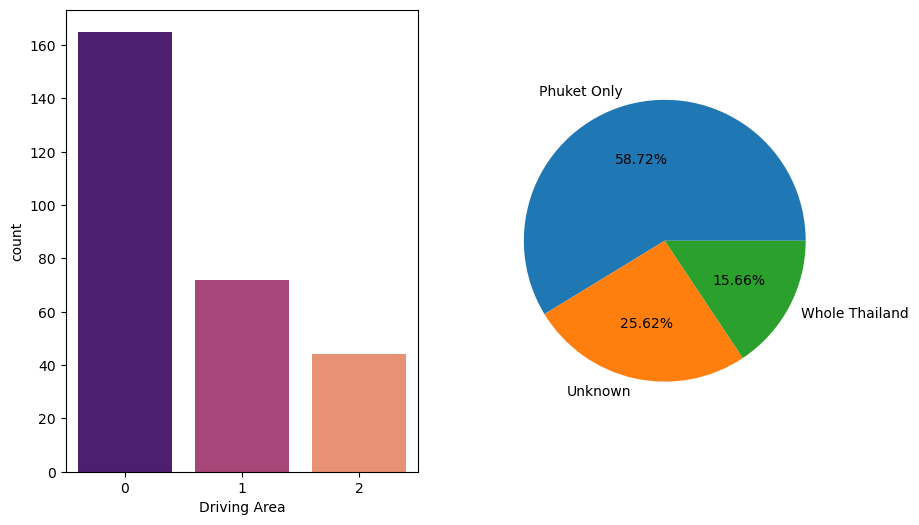

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=df["Driving Area"], palette="magma")
plt.subplot(1,2,2)
lables = ["Phuket Only", "Unknown", "Whole Thailand"]
plt.pie(x=df["Driving Area"].value_counts(), labels=lables, autopct = '%1.2f%%')

<Axes: xlabel='Total', ylabel='Rental_Duration_Days'>

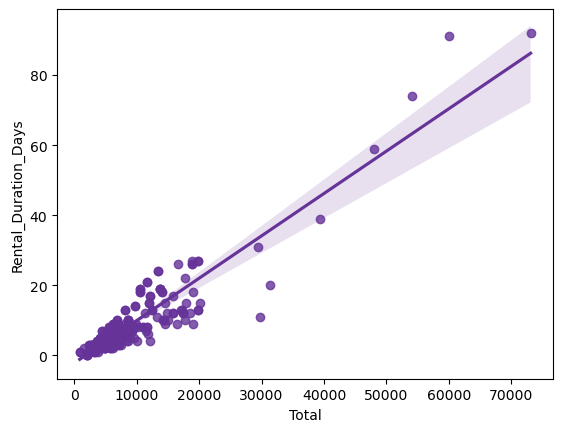

In [15]:
sns.regplot( x=df["Total"], y=df["Rental_Duration_Days"], color="rebeccapurple")

## Correlation Matrix

<Axes: >

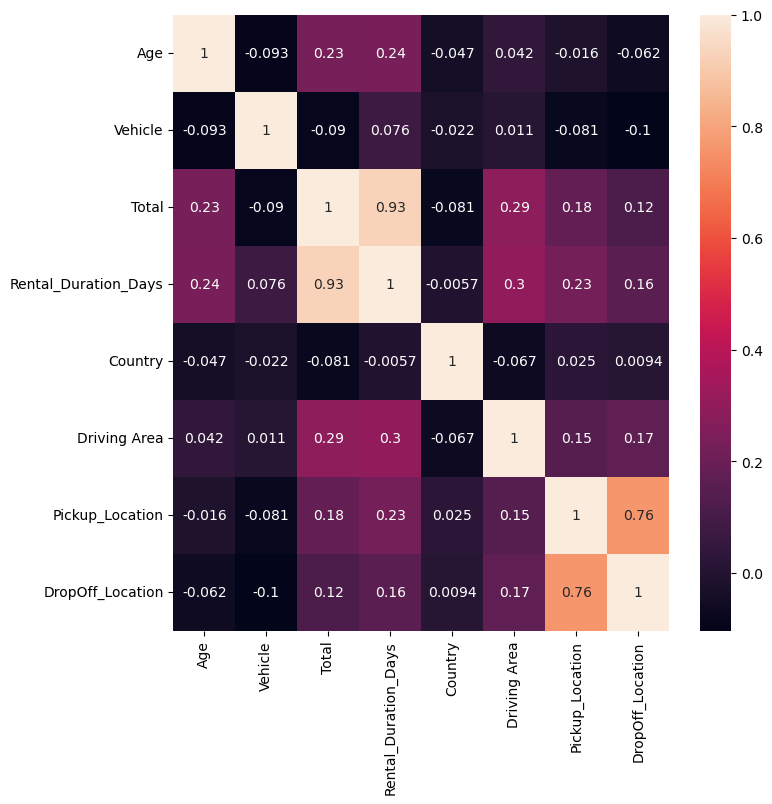

In [19]:
plt.figure(figsize=(8,8))
cols = ["Age", "Vehicle", "Total", "Rental_Duration_Days", "Country", "Driving Area", "Pickup_Location", "DropOff_Location"]
sns.heatmap(df[cols].corr(), annot=True)

<Axes: >

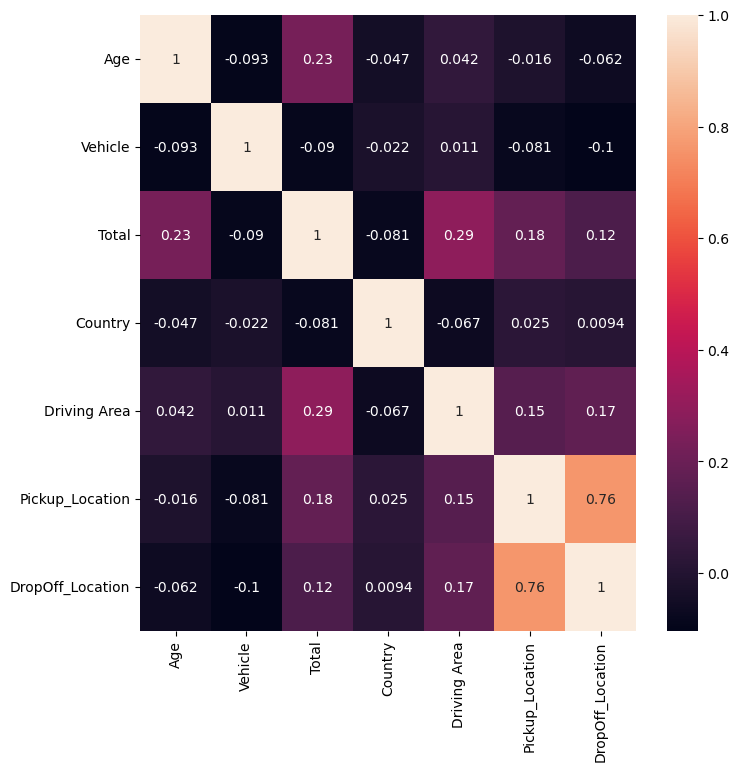

In [25]:
df.drop(["Rental_Duration_Days"], axis = 1)
cols = ["Age", "Vehicle", "Total", "Country", "Driving Area", "Pickup_Location", "DropOff_Location"]
plt.figure(figsize=(8,8))
sns.heatmap(df[cols].corr(), annot=True)

In [28]:
df.shape
df.to_csv('../data/vikar_prepared.csv',index=False)